In [ ]:
from comet_ml import Experiment

experiment = Experiment(project_name="igti-projeto-aplicado-leis", workspace="piantino")

In [1]:
import pandas as pd

colunas = ['ROTULO_MANUAL', 'EMENTA_NORM']

df = pd.read_csv('../data/ementas_pre-processadas.csv', header=0, sep=',', quotechar='"', usecols=colunas)

In [2]:
rotulos = ['EXP', 'BAN', 'OIG', 'DAN', 'SEG', 'CON', 'OIE']

In [3]:
df.loc[~df['ROTULO_MANUAL'].isin(rotulos)] = 'NONE'

groupby_rotulo = df.groupby('ROTULO_MANUAL')
groupby_rotulo.count()

,EMENTA_NORM
ROTULO_MANUAL,
BAN,971
CON,832
DAN,888
EXP,1784
NONE,3191
OIE,735
OIG,752
SEG,761


In [4]:
x = df['EMENTA_NORM'].values.astype('U')
y = df['ROTULO_MANUAL'].values

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

import collections

print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({'NONE': 2413, 'EXP': 1316, 'BAN': 747, 'DAN': 668, 'CON': 635, 'SEG': 561, 'OIE': 548, 'OIG': 547})
Counter({'NONE': 778, 'EXP': 468, 'BAN': 224, 'DAN': 220, 'OIG': 205, 'SEG': 200, 'CON': 197, 'OIE': 187})


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression

vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = LogisticRegression(solver='lbfgs')

text_clf = Pipeline([
    ('vect', vect),
    ('tfidf', tfidf),
    ('dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True, validate=True)),
    ('clf', clf)
])


text_clf.fit(x_train, y_train)

/home/piantino/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                     func=<function <lambda> at 0x7f2acfc98510>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, pass_y='deprecated',
                                     validate=True)),
                ('clf',
                 LogisticRegres

In [7]:
# Predict Class
y_pred = text_clf.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8987494957644211

In [9]:
set(y_test)

{'BAN', 'CON', 'DAN', 'EXP', 'NONE', 'OIE', 'OIG', 'SEG'}

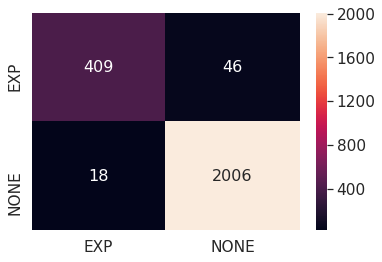

In [15]:
from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)

labels = set(y_test)

df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, xticklabels=labels, yticklabels=labels, annot=True, fmt='g', annot_kws={"size": 16})

In [10]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         BAN       0.83      0.80      0.82       224
         CON       0.77      0.71      0.74       197
         DAN       0.81      0.75      0.78       220
         EXP       0.91      0.98      0.95       468
        NONE       1.00      1.00      1.00       778
         OIE       0.87      0.78      0.82       187
         OIG       0.89      0.90      0.90       205
         SEG       0.79      0.88      0.83       200

    accuracy                           0.90      2479
   macro avg       0.86      0.85      0.85      2479
weighted avg       0.90      0.90      0.90      2479



In [24]:
from sklearn.externals import joblib

joblib.dump(vect, '../modelos/CountVectorizer-' + rotulo + '.pkl', compress = 1)
joblib.dump(tfidf, '../modelos/TfidfTransformer-' + rotulo + '.pkl', compress = 1) 
joblib.dump(clf, '../modelos/Modelo-' + rotulo + '.pkl', compress = 1) 

['../modelos/Modelo-EXP.pkl']